### Import libraries 

In [169]:
#per creare rete
import pandas as pd
from rich import print
import networkx as nx
import networkx.algorithms as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.utils import np_random_state

#per la task
import networkx as nx
import cdlib
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph

#altre
import seaborn as sns
import numpy as np
import math
import warnings
from collections import Counter
import numpy as np
warnings.filterwarnings('ignore')

In [170]:
G=nx.read_gexf('first_net.gexf', node_type=int)
df_nodes=pd.read_csv('df_final_nodes.csv')
df_nodes['node']=df_nodes['node'].map(int)
df_nodes=df_nodes.set_index('node')
df_nodes['location']=df_nodes['location'].fillna('no loc')
df_nodes.head()

,Unnamed: 0,category,location,label
node,,,,
290883,0,pax,European Union,290883
1471971,1,proukr,no loc,1471971
2052911,2,pax,"London, England",2052911
2827221,3,dontcare,NYC,2827221
3688111,4,proukr,Bangkok,3688111


In [171]:
def divide_geo(geo):
    if ',' in geo:
        loc=geo.split(',')
        return loc[len(loc)-1]
    else:
        return geo
df_nodes['location']=df_nodes['location'].map(divide_geo)

In [172]:
df_nodes['location'].value_counts()

no loc                          3816
 USA                             540
 England                         293
 CA                              121
United States                    121
                                ... 
Albano Laziale (RM)                1
Above the Wall                     1
Born in Milan Made in Mantua       1
South of the Wall                  1
 Vietnam                           1
Name: location, Length: 2833, dtype: int64

In [173]:
G.number_of_edges()

12767

In [174]:
G.number_of_nodes()

11197

# Community discovery algorithms

# Label Propagation

In [175]:
label_prop = algorithms.label_propagation(G)
label_prop.method_name

'Label Propagation'

In [176]:
label_prop_com=label_prop.communities
communities=[]

for i, c in enumerate(label_prop_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'category'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'category'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'category'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'category'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus #,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 393}, {'proukr': 1346}, {'nocare': 123}, {'prorus': 73})},
 {1: ({'pax': 357}, {'proukr': 1010}, {'nocare': 107}, {'prorus': 64})},
 {2: ({'pax': 101}, {'proukr': 380}, {'nocare': 37}, {'prorus': 24})},
 {3: ({'pax': 118}, {'proukr': 354}, {'nocare': 24}, {'prorus': 14})},
 {4: ({'pax': 76}, {'proukr': 242}, {'nocare': 29}, {'prorus': 14})},
 {5: ({'pax': 69}, {'proukr': 210}, {'nocare': 21}, {'prorus': 8})},
 {6: ({'pax': 45}, {'proukr': 157}, {'nocare': 19}, {'prorus': 4})},
 {7: ({'pax': 26}, {'proukr': 90}, {'nocare': 12}, {'prorus': 8})},
 {8: ({'pax': 23}, {'proukr': 96}, {'nocare': 5}, {'prorus': 11})},
 {9: ({'pax': 24}, {'proukr': 77}, {'nocare': 7}, {'prorus': 6})},
 {10: ({'pax': 20}, {'proukr': 78}, {'nocare': 5}, {'prorus': 8})},
 {11: ({'pax': 27}, {'proukr': 75}, {'nocare': 5}, {'prorus': 4})},
 {12: ({'pax': 28}, {'proukr': 60}, {'nocare': 11}, {'prorus': 1})},
 {13: ({'pax': 29}, {'proukr': 54}, {'nocare': 5}, {'prorus': 6})},
 {14: ({'pax': 21}, {'proukr

In [177]:
print(len(label_prop.communities))

603

In [178]:
label_prop.overlap

False

In [179]:
label_prop.node_coverage

1.0

In [180]:
#label_prop.to_json()

# Louvain 

In [181]:
#Leiden algorithm is an improvement of the Louvain algorithm
louvain = algorithms.leiden(G)
louvain.method_name 

'Leiden'

In [182]:
#Clustering parameters
louvain.method_parameters 

{'initial_membership': None, 'weights': None}

In [183]:
louvain_com=louvain.communities
communities=[]

for i, c in enumerate(louvain_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'category'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'category'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'category'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'category'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus #,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 331}, {'proukr': 1165}, {'nocare': 109}, {'prorus': 57})},
 {1: ({'pax': 253}, {'proukr': 684}, {'nocare': 78}, {'prorus': 46})},
 {2: ({'pax': 148}, {'proukr': 461}, {'nocare': 47}, {'prorus': 28})},
 {3: ({'pax': 102}, {'proukr': 394}, {'nocare': 37}, {'prorus': 27})},
 {4: ({'pax': 118}, {'proukr': 380}, {'nocare': 23}, {'prorus': 14})},
 {5: ({'pax': 102}, {'proukr': 355}, {'nocare': 36}, {'prorus': 18})},
 {6: ({'pax': 63}, {'proukr': 229}, {'nocare': 24}, {'prorus': 8})},
 {7: ({'pax': 68}, {'proukr': 212}, {'nocare': 19}, {'prorus': 12})},
 {8: ({'pax': 54}, {'proukr': 161}, {'nocare': 22}, {'prorus': 16})},
 {9: ({'pax': 54}, {'proukr': 142}, {'nocare': 12}, {'prorus': 13})},
 {10: ({'pax': 51}, {'proukr': 142}, {'nocare': 13}, {'prorus': 8})},
 {11: ({'pax': 52}, {'proukr': 136}, {'nocare': 12}, {'prorus': 7})},
 {12: ({'pax': 44}, {'proukr': 139}, {'nocare': 18}, {'prorus': 6})},
 {13: ({'pax': 40}, {'proukr': 129}, {'nocare': 15}, {'prorus': 9})},
 {14: ({'pax'

In [184]:
len(louvain.communities)

271

In [185]:
#veirfy if the clustering overlap or not
louvain.overlap 

False

In [186]:
#percentage of node covered by the clustering
louvain.node_coverage 

1.0

In [187]:
#json representation of the results
#louvain.to_json()

# K-clique

In [188]:
k_clique=algorithms.kclique(G,k=3)

In [189]:
k_clique_com=k_clique.communities
communities=[]

for i, c in enumerate(k_clique_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'category'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'category'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'category'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'category'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus#,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 66}, {'proukr': 183}, {'nocare': 16}, {'prorus': 11})},
 {1: ({'pax': 25}, {'proukr': 86}, {'nocare': 7}, {'prorus': 7})},
 {2: ({'pax': 14}, {'proukr': 26}, {'nocare': 2}, {'prorus': 3})},
 {3: ({'pax': 7}, {'proukr': 24}, {'nocare': 4}, {'prorus': 1})},
 {4: ({'pax': 4}, {'proukr': 9}, {'nocare': 2}, {'prorus': 0})},
 {5: ({'pax': 4}, {'proukr': 7}, {'nocare': 1}, {'prorus': 1})},
 {6: ({'pax': 1}, {'proukr': 6}, {'nocare': 1}, {'prorus': 0})},
 {7: ({'pax': 2}, {'proukr': 5}, {'nocare': 0}, {'prorus': 0})},
 {8: ({'pax': 0}, {'proukr': 0}, {'nocare': 0}, {'prorus': 0})},
 {9: ({'pax': 2}, {'proukr': 2}, {'nocare': 1}, {'prorus': 0})},
 {10: ({'pax': 1}, {'proukr': 4}, {'nocare': 0}, {'prorus': 0})},
 {11: ({'pax': 0}, {'proukr': 3}, {'nocare': 1}, {'prorus': 1})},
 {12: ({'pax': 0}, {'proukr': 0}, {'nocare': 0}, {'prorus': 0})},
 {13: ({'pax': 1}, {'proukr': 1}, {'nocare': 0}, {'prorus': 2})},
 {14: ({'pax': 3}, {'proukr': 0}, {'nocare': 0}, {'prorus': 1})},
 {15: ({'p

In [190]:
len(k_clique.communities)

44

In [191]:
k_clique.overlap

True

In [192]:
k_clique.node_coverage

0.054657497543984995

In [193]:
#k_clique.to_json()

# Angel 

In [194]:
angel= algorithms.angel(G, threshold=0.5)#min_com_size=3

In [195]:
angel.method_parameters

{'threshold': 0.5, 'min_community_size': 3}

In [196]:
angel_com=angel.communities
communities=[]

for i, c in enumerate(angel_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'category'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'category'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'category'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'category'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus #,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 58}, {'proukr': 164}, {'nocare': 13}, {'prorus': 10})},
 {1: ({'pax': 15}, {'proukr': 53}, {'nocare': 3}, {'prorus': 4})},
 {2: ({'pax': 12}, {'proukr': 38}, {'nocare': 4}, {'prorus': 4})},
 {3: ({'pax': 7}, {'proukr': 24}, {'nocare': 4}, {'prorus': 1})},
 {4: ({'pax': 11}, {'proukr': 19}, {'nocare': 2}, {'prorus': 2})},
 {5: ({'pax': 6}, {'proukr': 13}, {'nocare': 2}, {'prorus': 0})},
 {6: ({'pax': 4}, {'proukr': 9}, {'nocare': 2}, {'prorus': 0})},
 {7: ({'pax': 4}, {'proukr': 7}, {'nocare': 1}, {'prorus': 1})},
 {8: ({'pax': 4}, {'proukr': 4}, {'nocare': 0}, {'prorus': 2})},
 {9: ({'pax': 1}, {'proukr': 6}, {'nocare': 1}, {'prorus': 0})},
 {10: ({'pax': 2}, {'proukr': 5}, {'nocare': 0}, {'prorus': 0})},
 {11: ({'pax': 0}, {'proukr': 0}, {'nocare': 0}, {'prorus': 0})},
 {12: ({'pax': 0}, {'proukr': 5}, {'nocare': 0}, {'prorus': 0})},
 {13: ({'pax': 3}, {'proukr': 0}, {'nocare': 0}, {'prorus': 1})},
 {14: ({'pax': 1}, {'proukr': 3}, {'nocare': 0}, {'prorus': 0})},
 {15: (

In [197]:
angel.overlap

True

In [198]:
angel.node_coverage

0.048495132624810214

In [199]:
#angel.to_json()

# Community Visualization

In [200]:
#pos = nx.spring_layout(G)

In [201]:
#viz.plot_network_clusters(G, louvain, pos, figsize=(10, 10), plot_labels=False)
#viz.plot_network_clusters(G,louvain, pos) visualizzazione alternativa

In [202]:
#viz.plot_network_clusters(G, label_prop, pos, figsize=(10, 10), plot_labels=False)

In [203]:
#viz.plot_network_clusters(G, angel, pos, figsize=(10, 10), plot_labels=False)

In [204]:
#viz.plot_network_clusters(G, girvan_newman, pos, figsize=(10, 10), plot_labels=False)

In [226]:
#viz.plot_community_graph(G, louvain, figsize=(5, 5))

In [206]:
#viz.plot_community_graph(G, label_prop, figsize=(5, 5))

In [207]:
#viz.plot_community_graph(G, angel, figsize=(5, 5))

In [208]:
#viz.plot_community_graph(G, k_clique, figsize=(5, 5))

# Community Internal Evaluation

In [209]:
method=[louvain,label_prop,k_clique,angel]
name_algo=['louvain','label_prop','k_clique','angel']
n_com=[]
size=[]
AND=[]
IED=[]
mod=[]
cond=[]
type_results=['MIN','MAX','SCORE', 'STD']
for algo in method:
    n_com.append(len(algo.communities))
    size.append(algo.size())
    AND.append(algo.average_internal_degree())
    IED.append(algo.internal_edge_density())
    mod.append(algo.modularity_density())
    cond.append(algo.conductance())
for i in range(len(type_results)):
    internal_evaluation=pd.DataFrame({'':name_algo,
                                     'Number of communities':n_com,
                                      'Size': size[i],
                                     'Average Node Degree': AND[i],
                                      'Internal Edge Density':IED[i],
                                      'Modularity':mod[i],
                                      'Conductance':cond[i]})
    internal_evaluation=internal_evaluation.fillna('0')
    internal_evaluation=internal_evaluation.set_index('')
    print('internal_evaluation', type_results[i])
    display(internal_evaluation)

internal_evaluation MIN

,Number of communities,Size,Average Node Degree,Internal Edge Density,Modularity,Conductance
,,,,,,
louvain,271,2.000000,1.000000,0.001208,0,0.000000
label_prop,603,1662.000000,3.169591,1.000000,0,0.185430
k_clique,44,41.317343,1.441735,0.584299,381.434935,0.014853
angel,21,144.640625,0.415390,0.379726,0,0.038318


internal_evaluation MAX

,Number of communities,Size,Average Node Degree,Internal Edge Density,Modularity,Conductance
,,,,,,
louvain,271,2.000000,1.000000,0.001038,0,0.000000
label_prop,603,1935.000000,2.685306,1.000000,0,0.777778
k_clique,44,18.568823,1.442775,0.566129,659.008012,0.162876
angel,21,107.443470,0.367233,0.357811,0,0.170869


internal_evaluation SCORE

,Number of communities,Size,Average Node Degree,Internal Edge Density,Modularity,Conductance
,,,,,,
louvain,271,3.000000,2.000000,0.023004,0,0.000000
label_prop,603,276.000000,6.326087,1.000000,0,0.996971
k_clique,44,14.681818,2.506852,0.815220,-5622.551821,0.813424
angel,21,44.356906,0.899768,0.303191,0,0.256018


internal_evaluation STD

,Number of communities,Size,Average Node Degree,Internal Edge Density,Modularity,Conductance
,,,,,,
louvain,271,3.000000,0.000000,0.000000,0,0.473684
label_prop,603,245.000000,6.465306,0.833333,0,1.000000
k_clique,44,26.857143,2.708563,0.364259,-1386.960905,0.799260
angel,21,52.348908,1.613422,0.286402,0,0.182088


### Community fitness/comparison visualization

<Figure size 3000x3000 with 0 Axes>

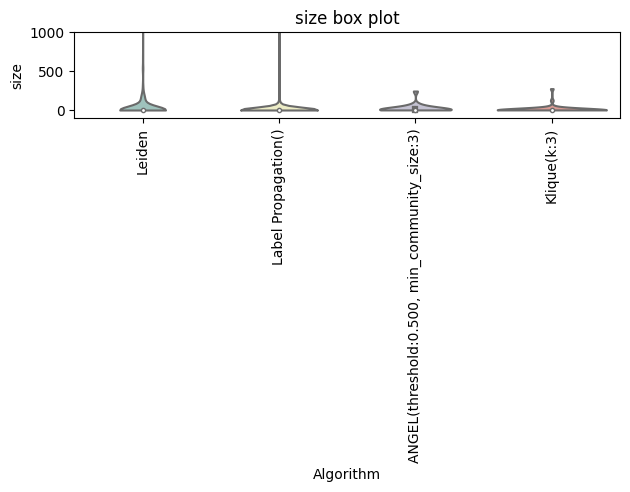

<Figure size 3000x3000 with 0 Axes>

In [210]:
viz.plot_com_stat([louvain, label_prop, angel, k_clique], evaluation.size)
plt.title('size box plot')
plt.ylim([-100,1000])
plt.figure(figsize=(30,30))


<AxesSubplot:xlabel='Algorithm', ylabel='average_internal_degree'>

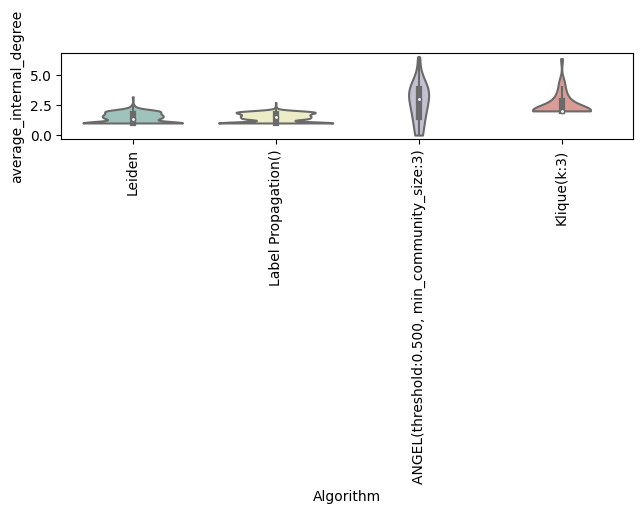

In [211]:
viz.plot_com_stat([louvain, label_prop, angel, k_clique], evaluation.average_internal_degree)

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

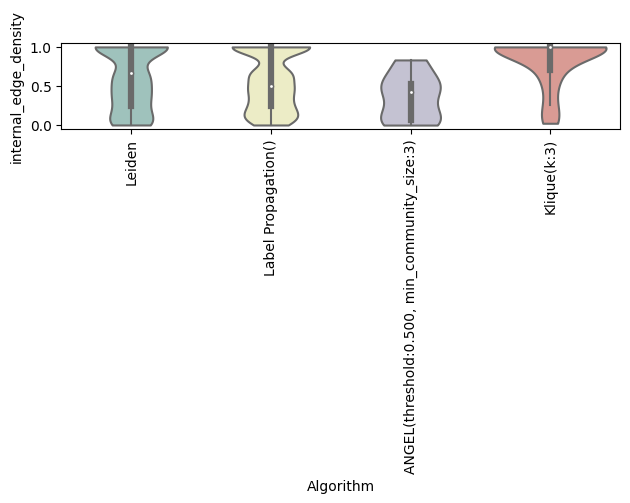

In [212]:
viz.plot_com_stat([louvain, label_prop, angel, k_clique], evaluation.internal_edge_density)

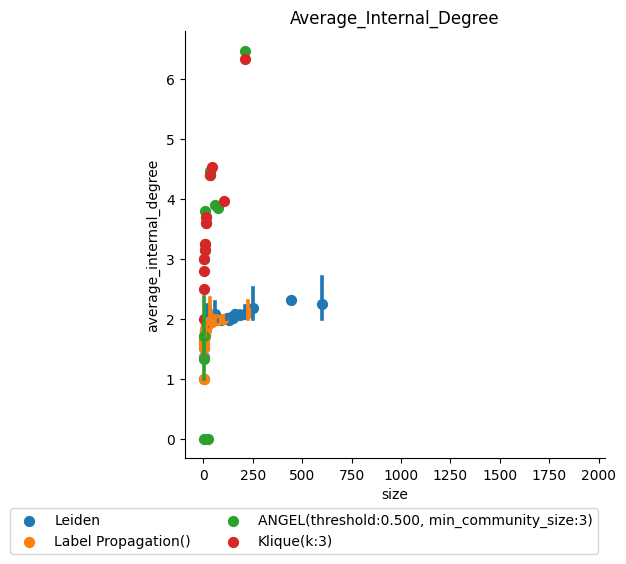

In [213]:
ax=viz.plot_com_properties_relation([louvain, label_prop, angel, k_clique], evaluation.size, evaluation.average_internal_degree) 
plt.title('Average_Internal_Degree')
plt.legend(bbox_to_anchor =(1, -0.10), ncol = 2)

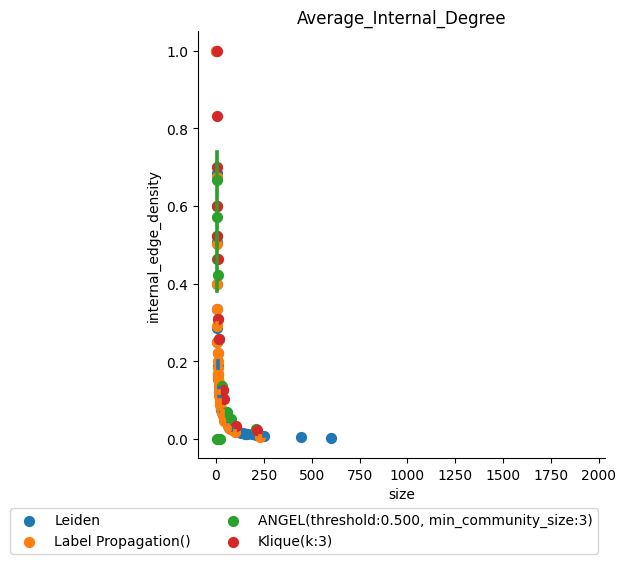

In [214]:
viz.plot_com_properties_relation([louvain, label_prop, angel, k_clique], evaluation.size, evaluation.internal_edge_density)
plt.title('Average_Internal_Degree')
plt.legend(bbox_to_anchor =(1, -0.10), ncol = 2)

# Partition Comparison

### NMI

In [215]:
evaluation.normalized_mutual_information(louvain, label_prop)

MatchingResult(score=0.8329089821433441, std=None)

### NF1

In [216]:
evaluation.nf1(label_prop,louvain)

MatchingResult(score=0.21345197302669874, std=None)

In [217]:
evaluation.nf1(label_prop,angel)

MatchingResult(score=0.00208902577061781, std=None)

In [218]:
evaluation.nf1(label_prop,k_clique)

MatchingResult(score=0.009801010253294287, std=None)

In [219]:
evaluation.nf1(louvain,angel)

MatchingResult(score=0.003725978818229741, std=None)

In [220]:
evaluation.nf1(louvain,k_clique)

MatchingResult(score=0.010552834619255283, std=None)

In [221]:
evaluation.nf1(k_clique,angel)

MatchingResult(score=0.24415584415584418, std=None)

# Ground Truth (External) evaluation

In [222]:
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph

g1 = LFR_benchmark_graph(1000, 3, 1.5, 0.5, min_community=20, average_degree=5)
g2 = LFR_benchmark_graph(1000, 3, 1.5, 0.6, min_community=20, average_degree=5)
g3 = LFR_benchmark_graph(1000, 3, 1.5, 0.7, min_community=20, average_degree=5)

names = ["g1", "g2", "g3"]
graphs = [g1, g2, g3]
references = []

In [223]:
# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden, algorithms.label_propagation]

<AxesSubplot:xlabel='graph', ylabel='score'>

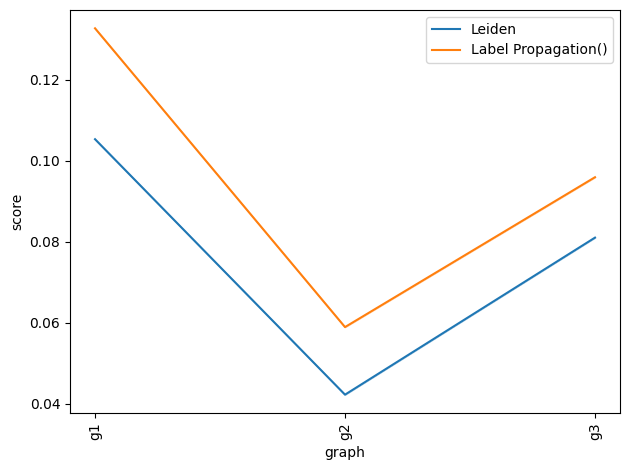

In [224]:
# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

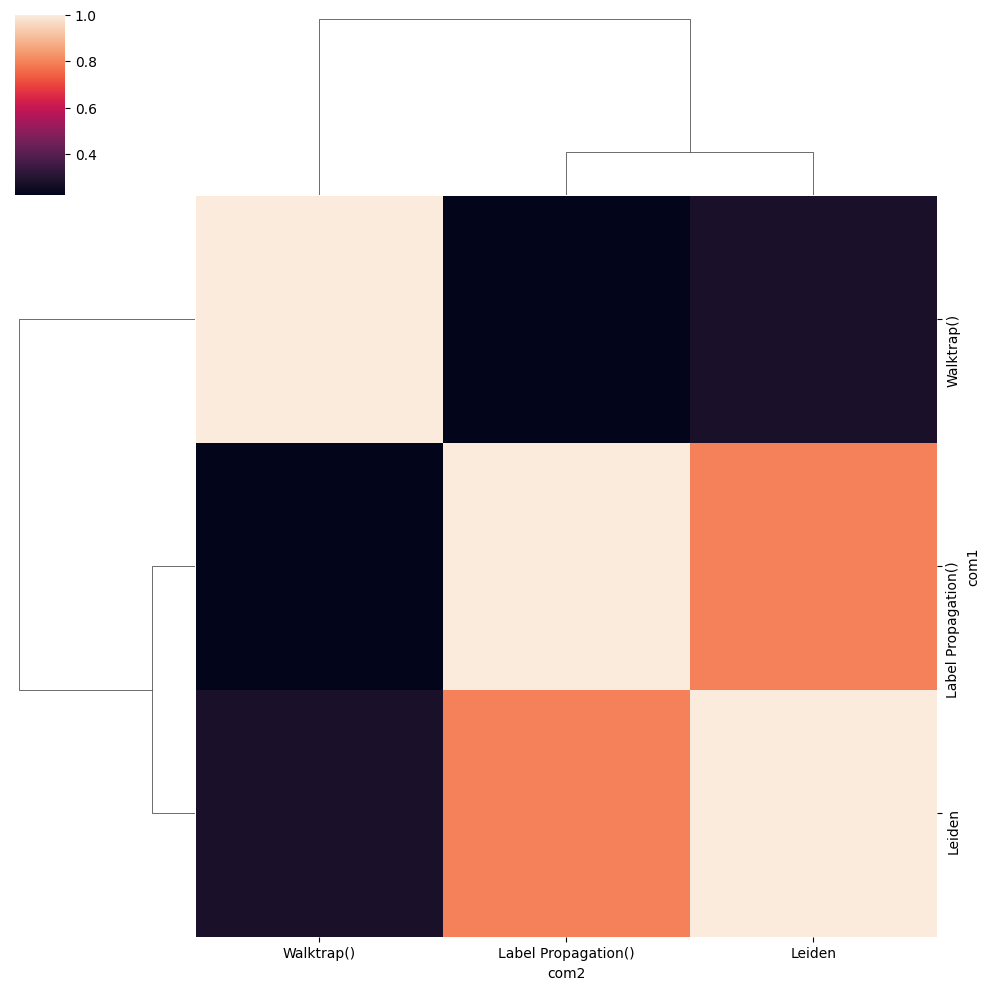

In [225]:
lp_coms = algorithms.label_propagation(G)
leiden_coms = algorithms.leiden(G)
wp_coms = algorithms.walktrap(G)
#infomap_coms = algorithms.infomap(G)

viz.plot_sim_matrix([leiden_coms, lp_coms, wp_coms],evaluation.adjusted_mutual_information) #, infomap_coms